D:\anaconda3\envs\pytorch\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


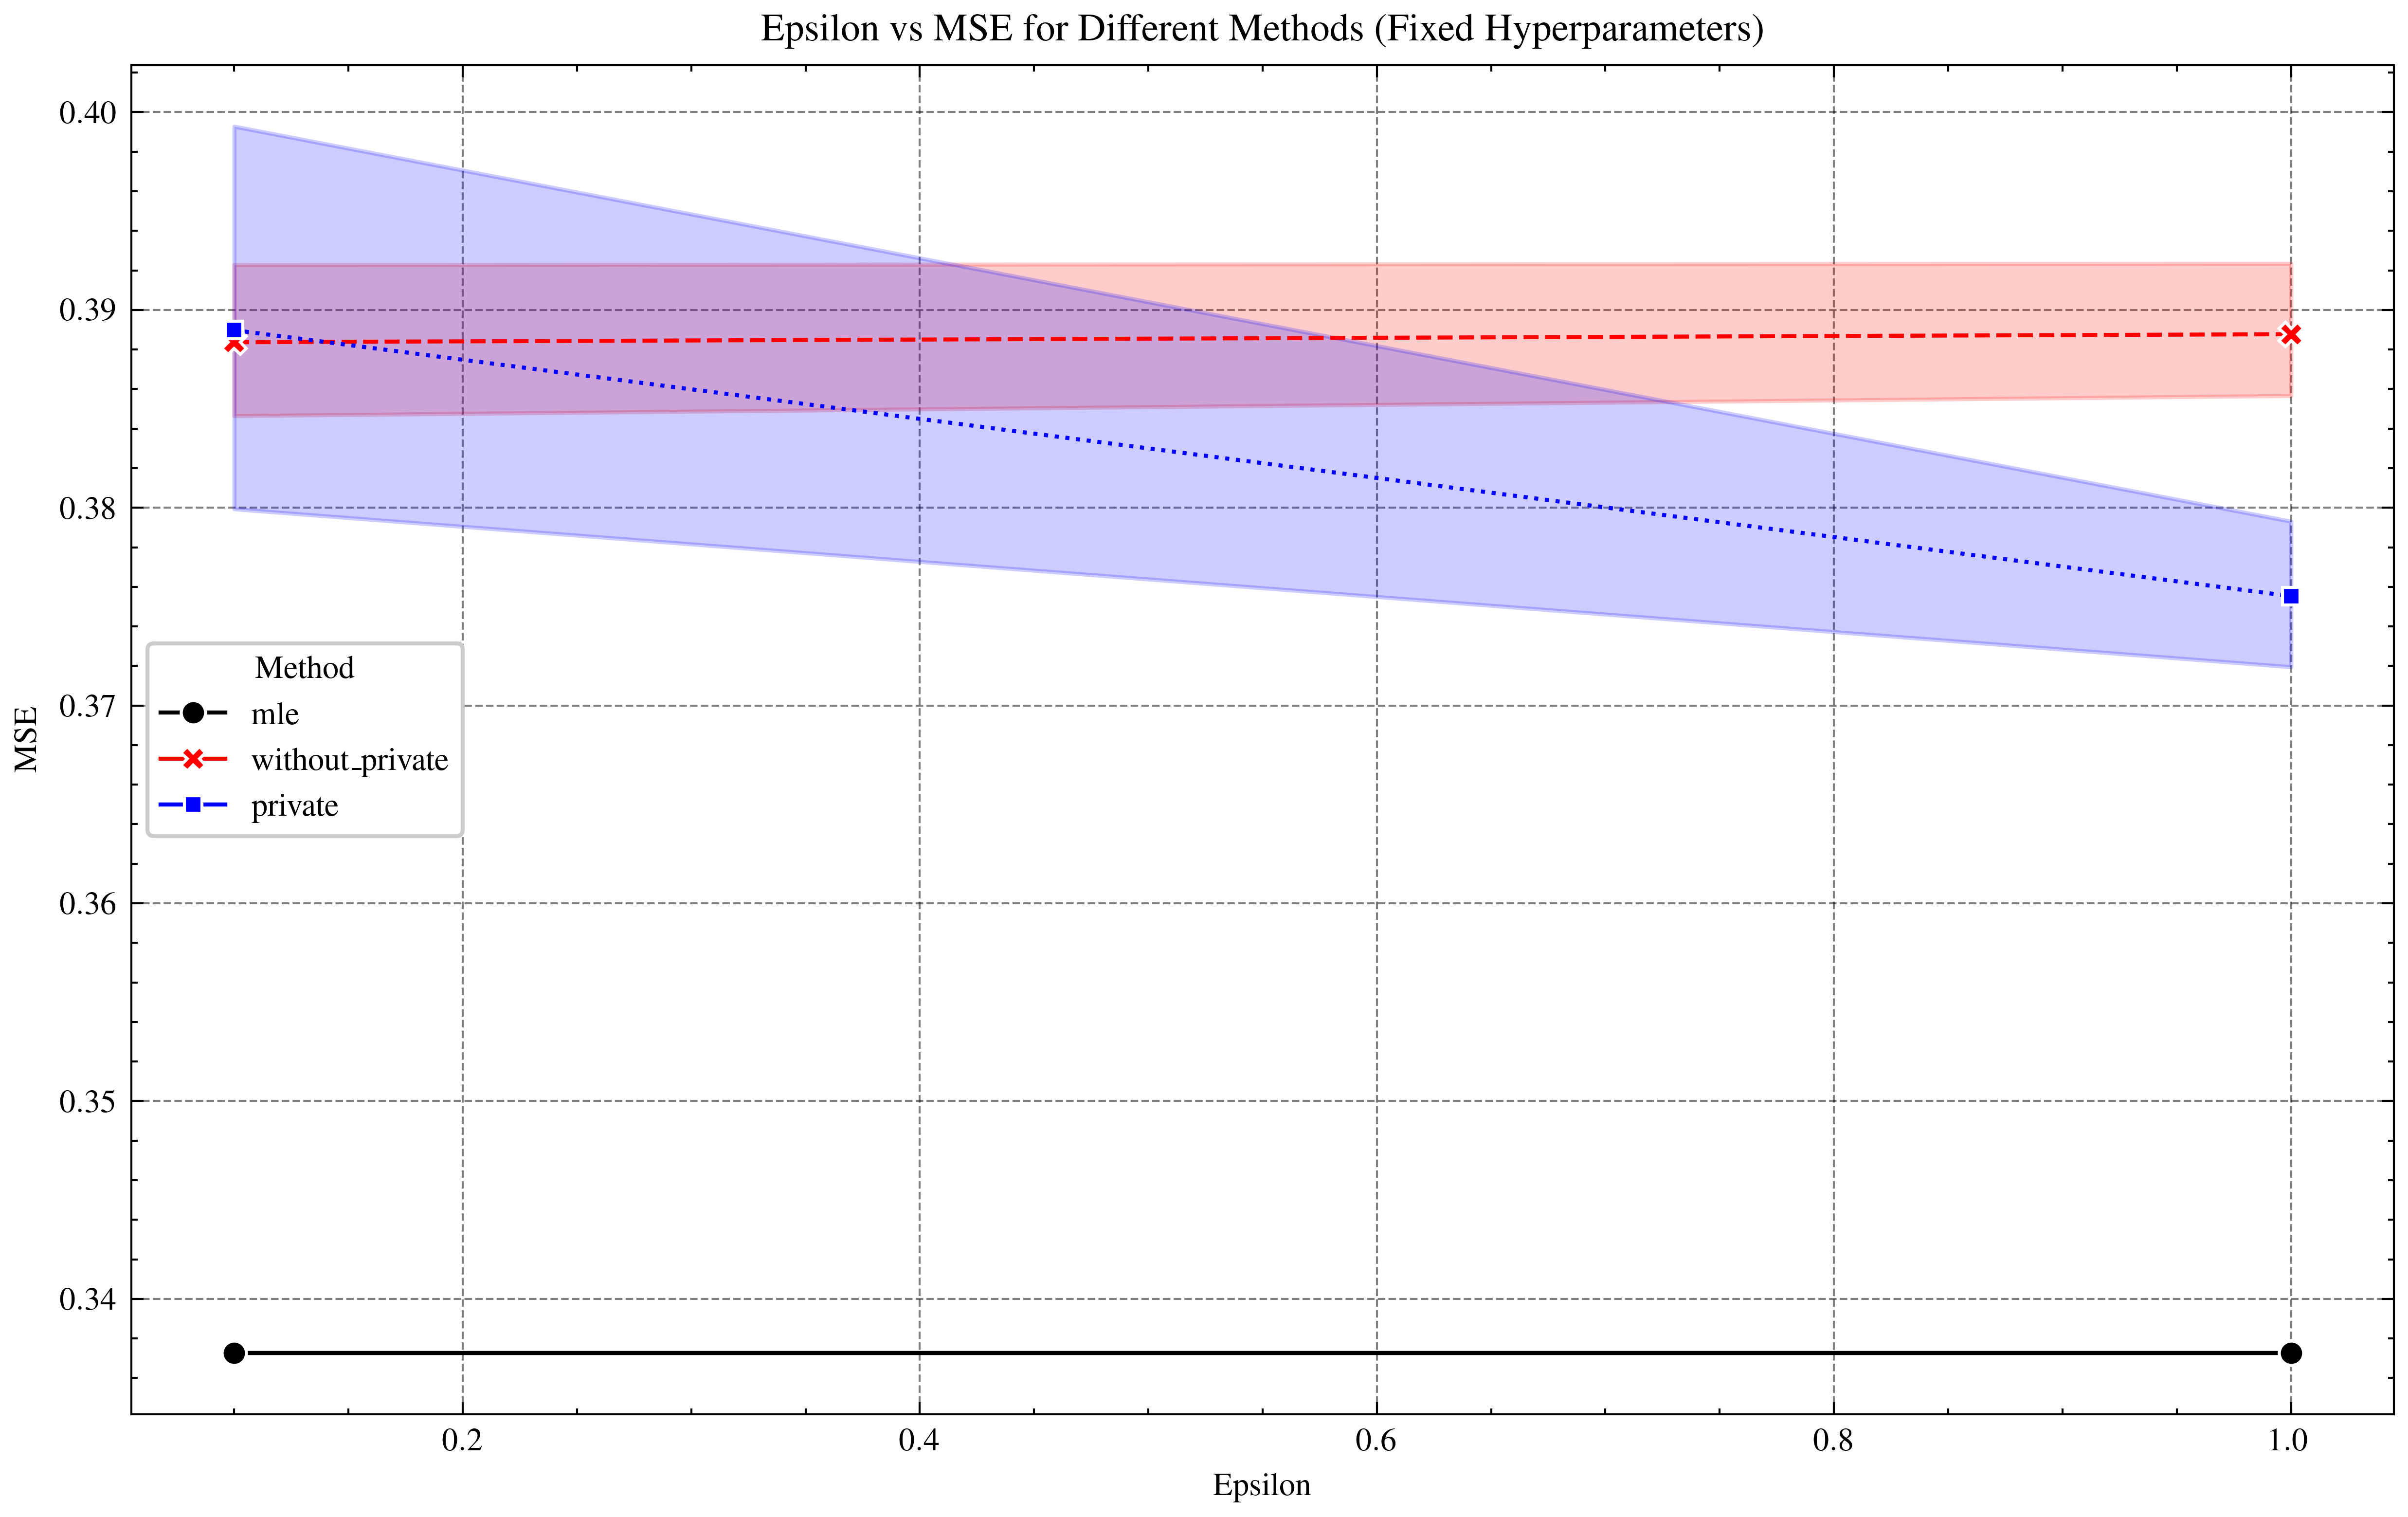

In [1]:
#import optuna
import torch
import torch.nn as nn
import numpy as np
from scipy.stats import halfnorm
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import minimize
import statsmodels.api as sm
import pandas as pd
import math
import os
#from tqdm import tqdm
from sklearn.model_selection import train_test_split, KFold
import seaborn as sns
from concurrent.futures import ProcessPoolExecutor
import scienceplots  # 导入 scienceplots

# 设置 scienceplots 样式
plt.style.use(['science', 'ieee', 'grid'])

# 使用 seaborn 绘制 epsilon 与 MSE 的关系图
def plot_epsilon_vs_mse():
    results = pd.read_csv(r"D:\GoogleDownload\result_epsilon_fixed_hyperparams.csv")
    
    # 排除 epsilon=0 的点
    results = results[results['epsilon'] > 0]
    
    plt.figure(figsize=(10, 6))
    
    # 使用 seaborn 绘制三种方法的 MSE 随 epsilon 变化的曲线
    sns.lineplot(data=results, x='epsilon', y='mse', hue='method', style='method', markers=True, dashes=False)
    
    plt.title('Epsilon vs MSE for Different Methods (Fixed Hyperparameters)')
    plt.xlabel('Epsilon')
    plt.ylabel('MSE')
    plt.legend(title='Method')
    plt.grid(True)
    plt.show()
    
plot_epsilon_vs_mse()

In [ ]:
"D:\GoogleDownload\epsilon_sensi.csv"

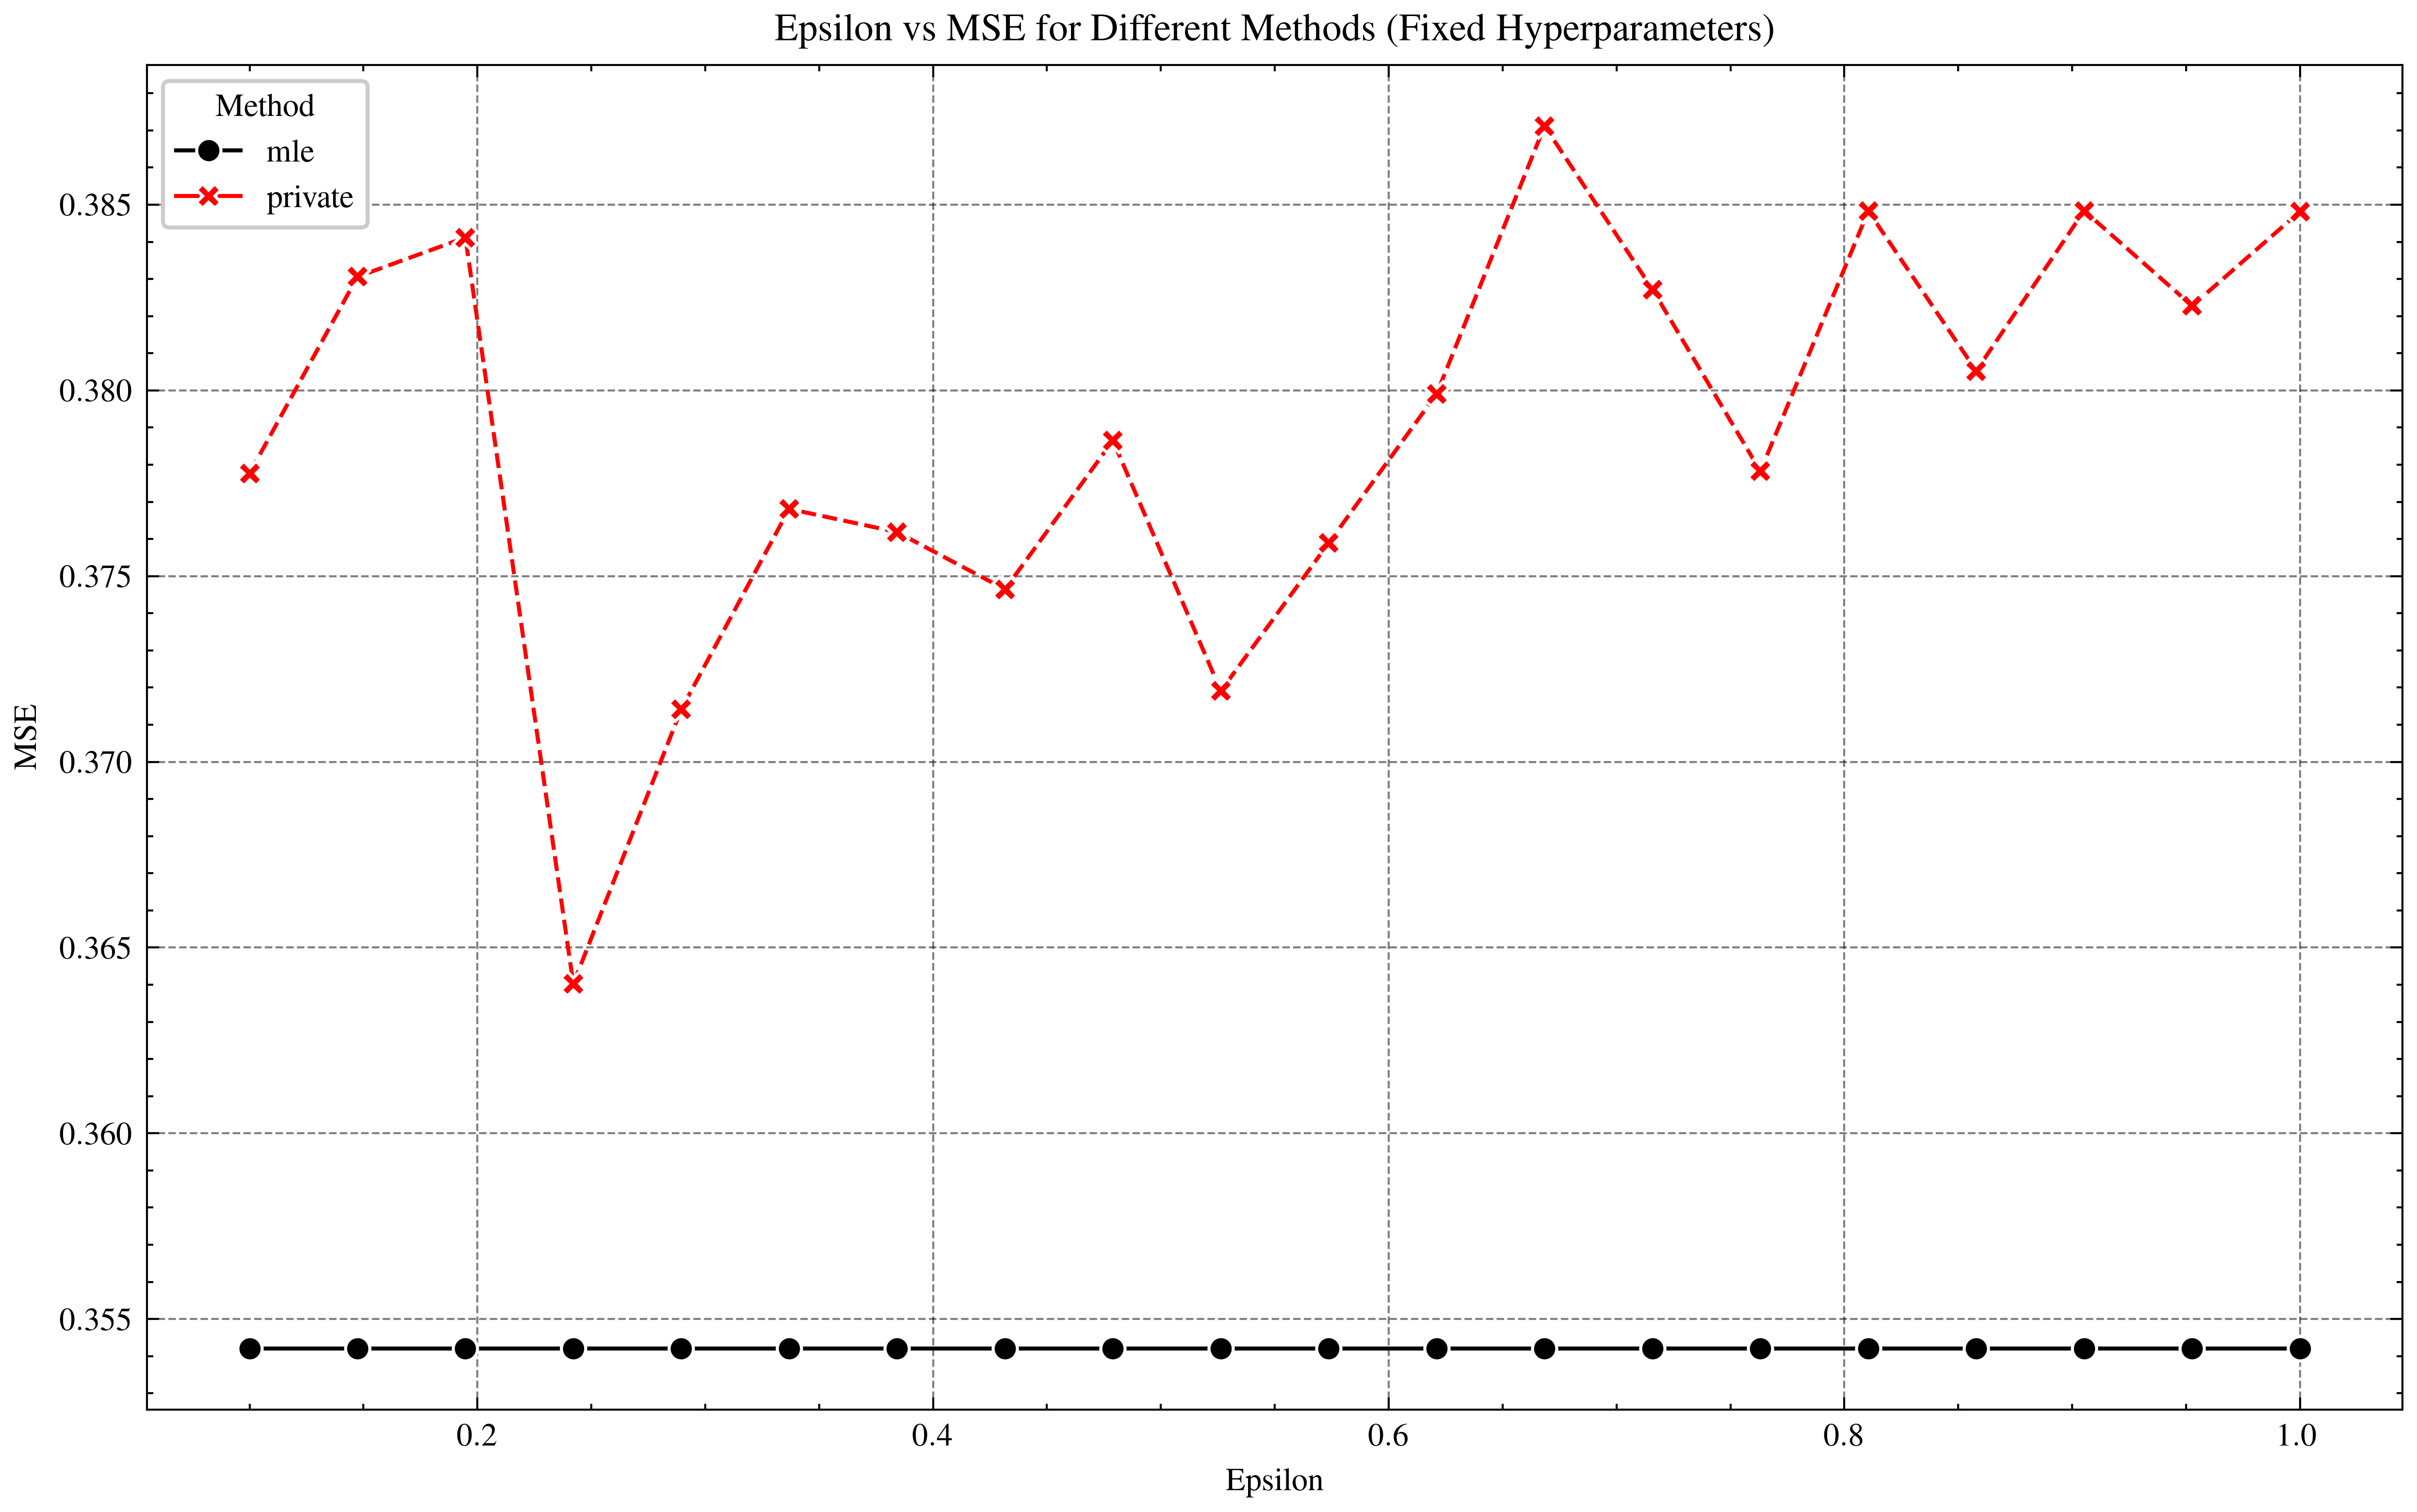

In [7]:
#import optuna
import torch
import torch.nn as nn
import numpy as np
from scipy.stats import halfnorm
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import minimize
import statsmodels.api as sm
import pandas as pd
import math
import os
#from tqdm import tqdm
from sklearn.model_selection import train_test_split, KFold
import seaborn as sns
from concurrent.futures import ProcessPoolExecutor
import scienceplots  # 导入 scienceplots

# 设置 scienceplots 样式
plt.style.use(['science', 'ieee', 'grid'])

# 使用 seaborn 绘制 epsilon 与 MSE 的关系图
def plot_epsilon_vs_mse():
    results = pd.read_csv(r"D:\GoogleDownload\result_epsilon_fixed_hyperparams_avg.csv")
    
    # 排除 epsilon=0 的点
    results = results[results['epsilon'] > 0]
    
    plt.figure(figsize=(10, 6))
    
    # 使用 seaborn 绘制三种方法的 MSE 随 epsilon 变化的曲线
    sns.lineplot(data=results, x='epsilon', y='mse', hue='method', style='method', markers=True, dashes=False)
    
    plt.title('Epsilon vs MSE for Different Methods (Fixed Hyperparameters)')
    plt.xlabel('Epsilon')
    plt.ylabel('MSE')
    plt.legend(title='Method')
    plt.grid(True)
    plt.show()
    
plot_epsilon_vs_mse()

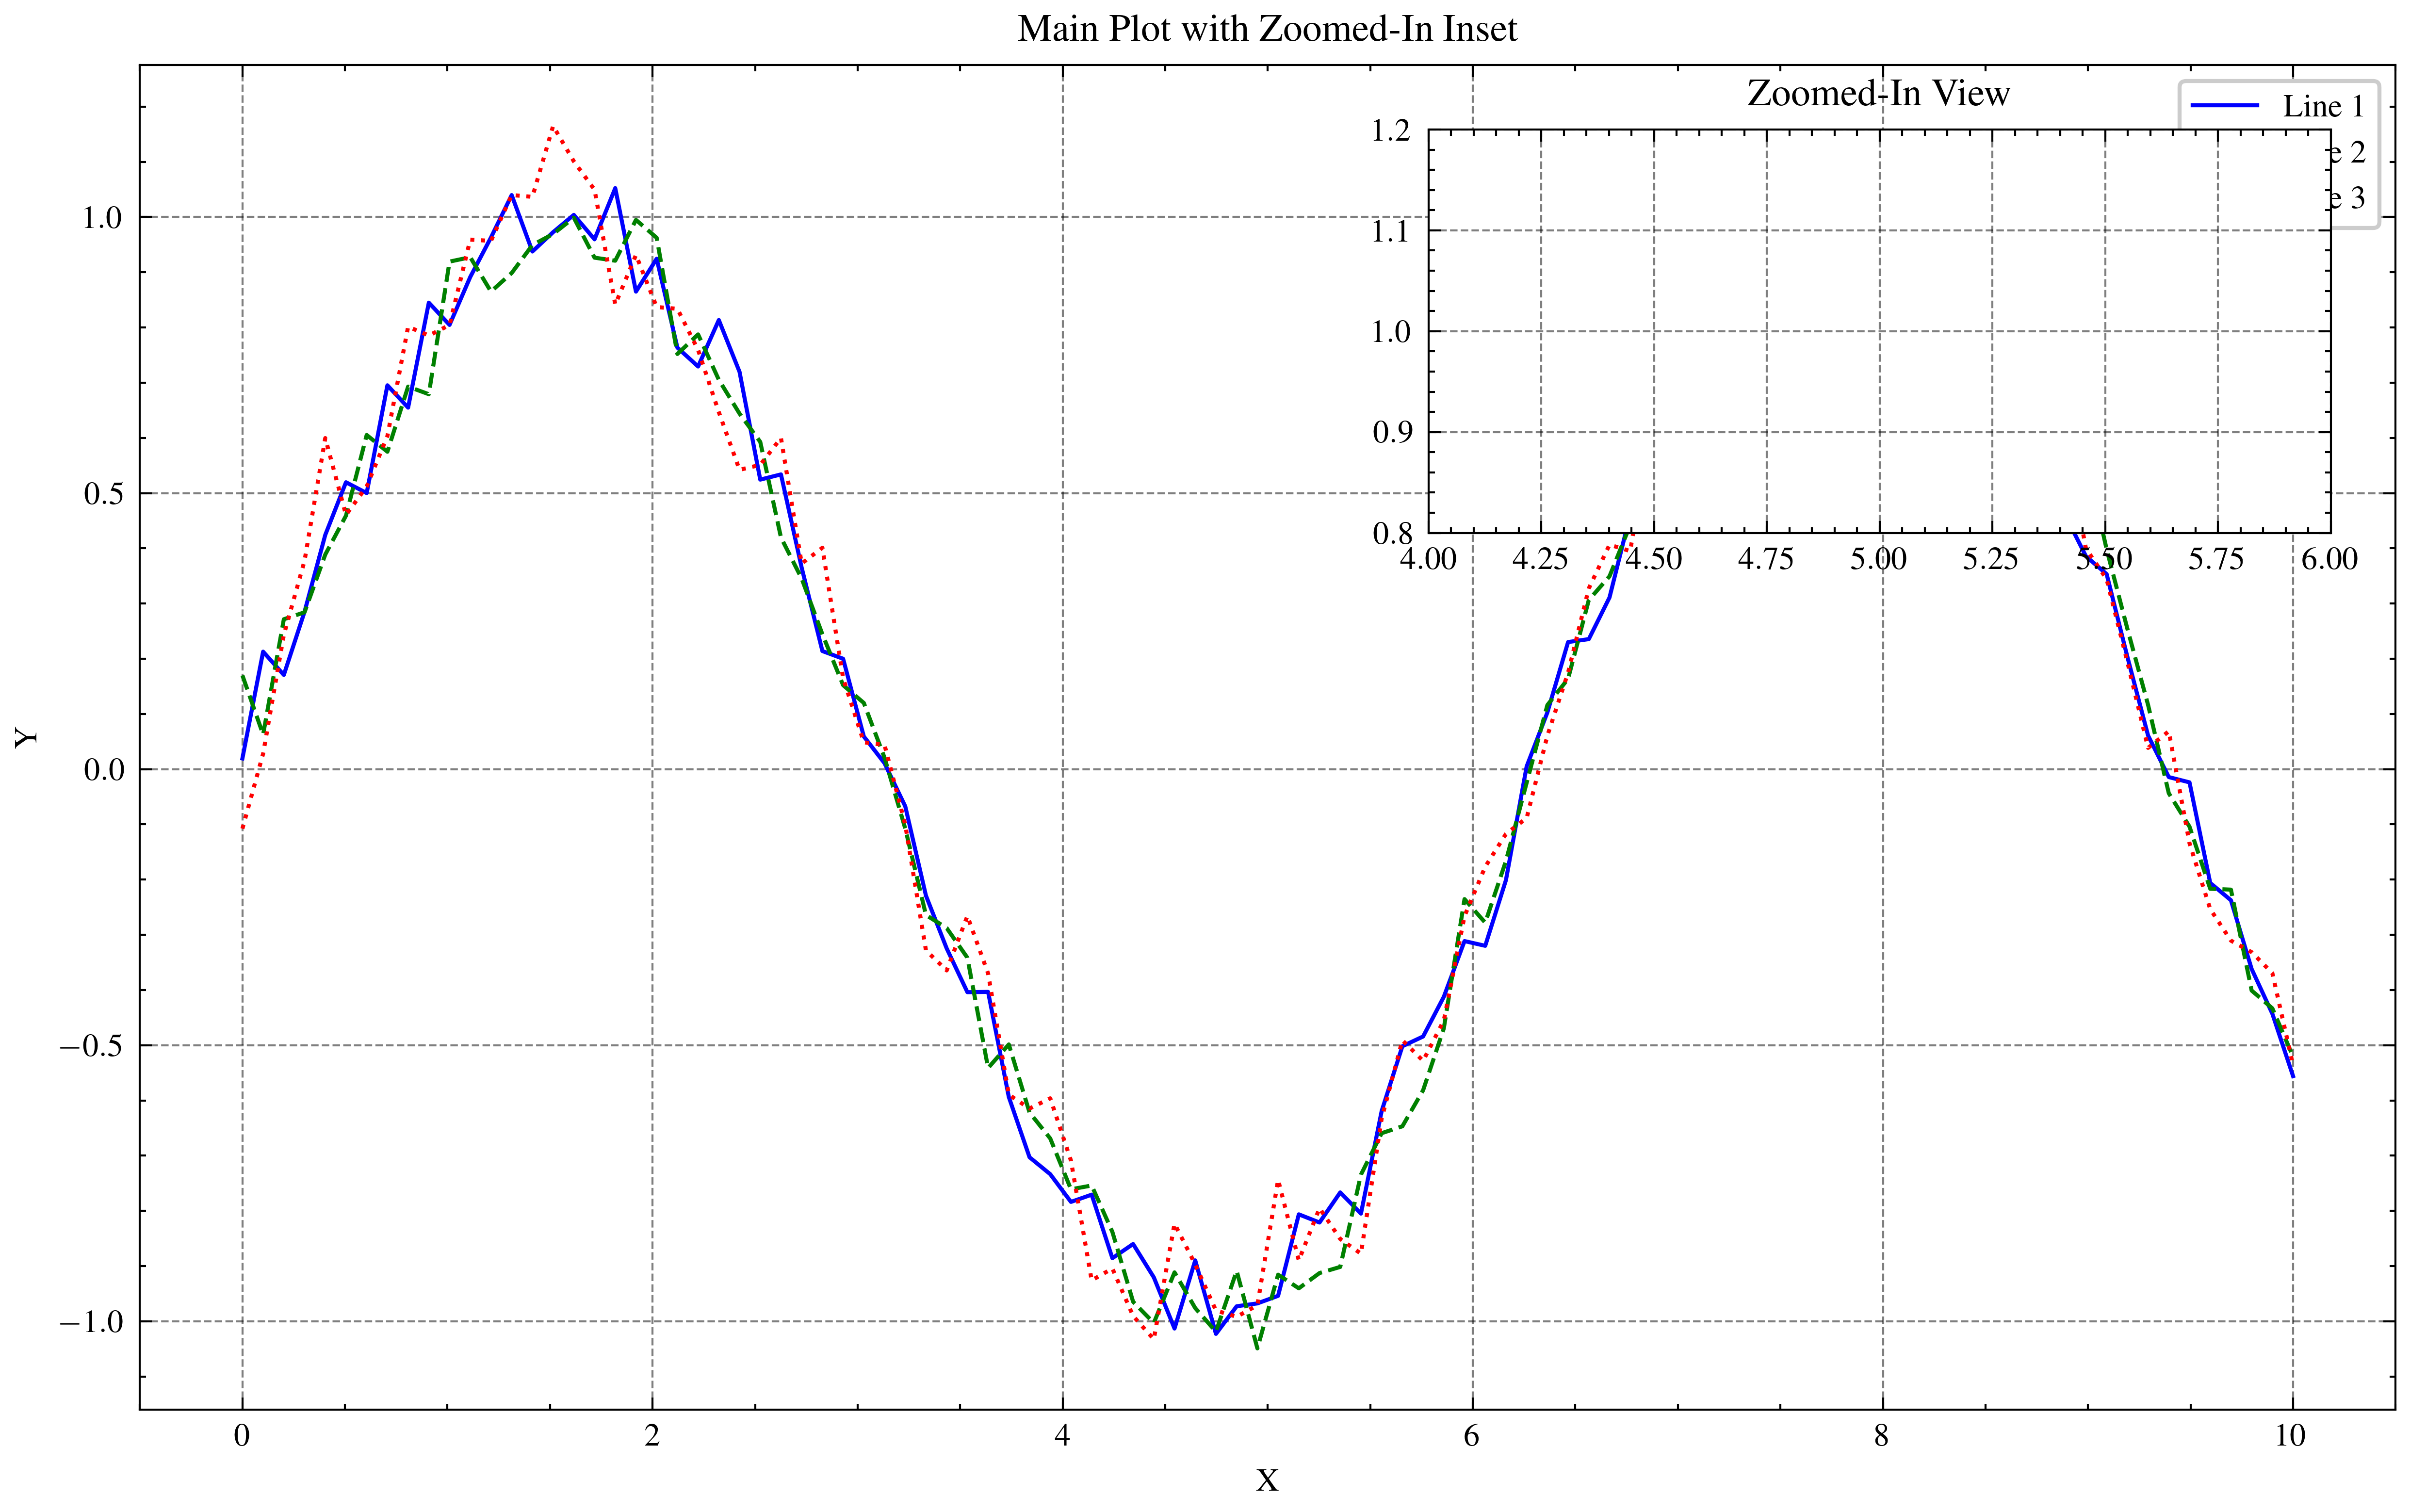

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# 生成示例数据
x = np.linspace(0, 10, 100)
y1 = np.sin(x) + 0.05 * np.random.normal(size=len(x))  # 第一条线
y2 = np.sin(x) + 0.06 * np.random.normal(size=len(x))  # 第二条线
y3 = np.sin(x) + 0.07 * np.random.normal(size=len(x))  # 第三条线

# 创建主图
fig, ax = plt.subplots(figsize=(10, 6))

# 绘制三条线
ax.plot(x, y1, label='Line 1', color='blue')
ax.plot(x, y2, label='Line 2', color='green')
ax.plot(x, y3, label='Line 3', color='red')

# 设置主图标题和标签
ax.set_title('Main Plot with Zoomed-In Inset')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()

# 添加局部放大窗口
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# 定义局部放大窗口的位置和范围
ax_inset = inset_axes(ax, width="40%", height="30%", loc='upper right', borderpad=2)

# 在局部放大窗口中绘制细节
zoom_x_start, zoom_x_end = 4, 6  # 放大范围
ax_inset.plot(x, y1, label='Line 1', color='blue')
ax_inset.plot(x, y2, label='Line 2', color='green')
ax_inset.plot(x, y3, label='Line 3', color='red')

# 设置局部放大窗口的范围
ax_inset.set_xlim(zoom_x_start, zoom_x_end)
ax_inset.set_ylim(0.8, 1.2)  # 根据需要调整 Y 轴范围

# 添加局部放大窗口的标题
ax_inset.set_title('Zoomed-In View')

# 显示网格（可选）
ax_inset.grid(True)

# 显示图
plt.show()

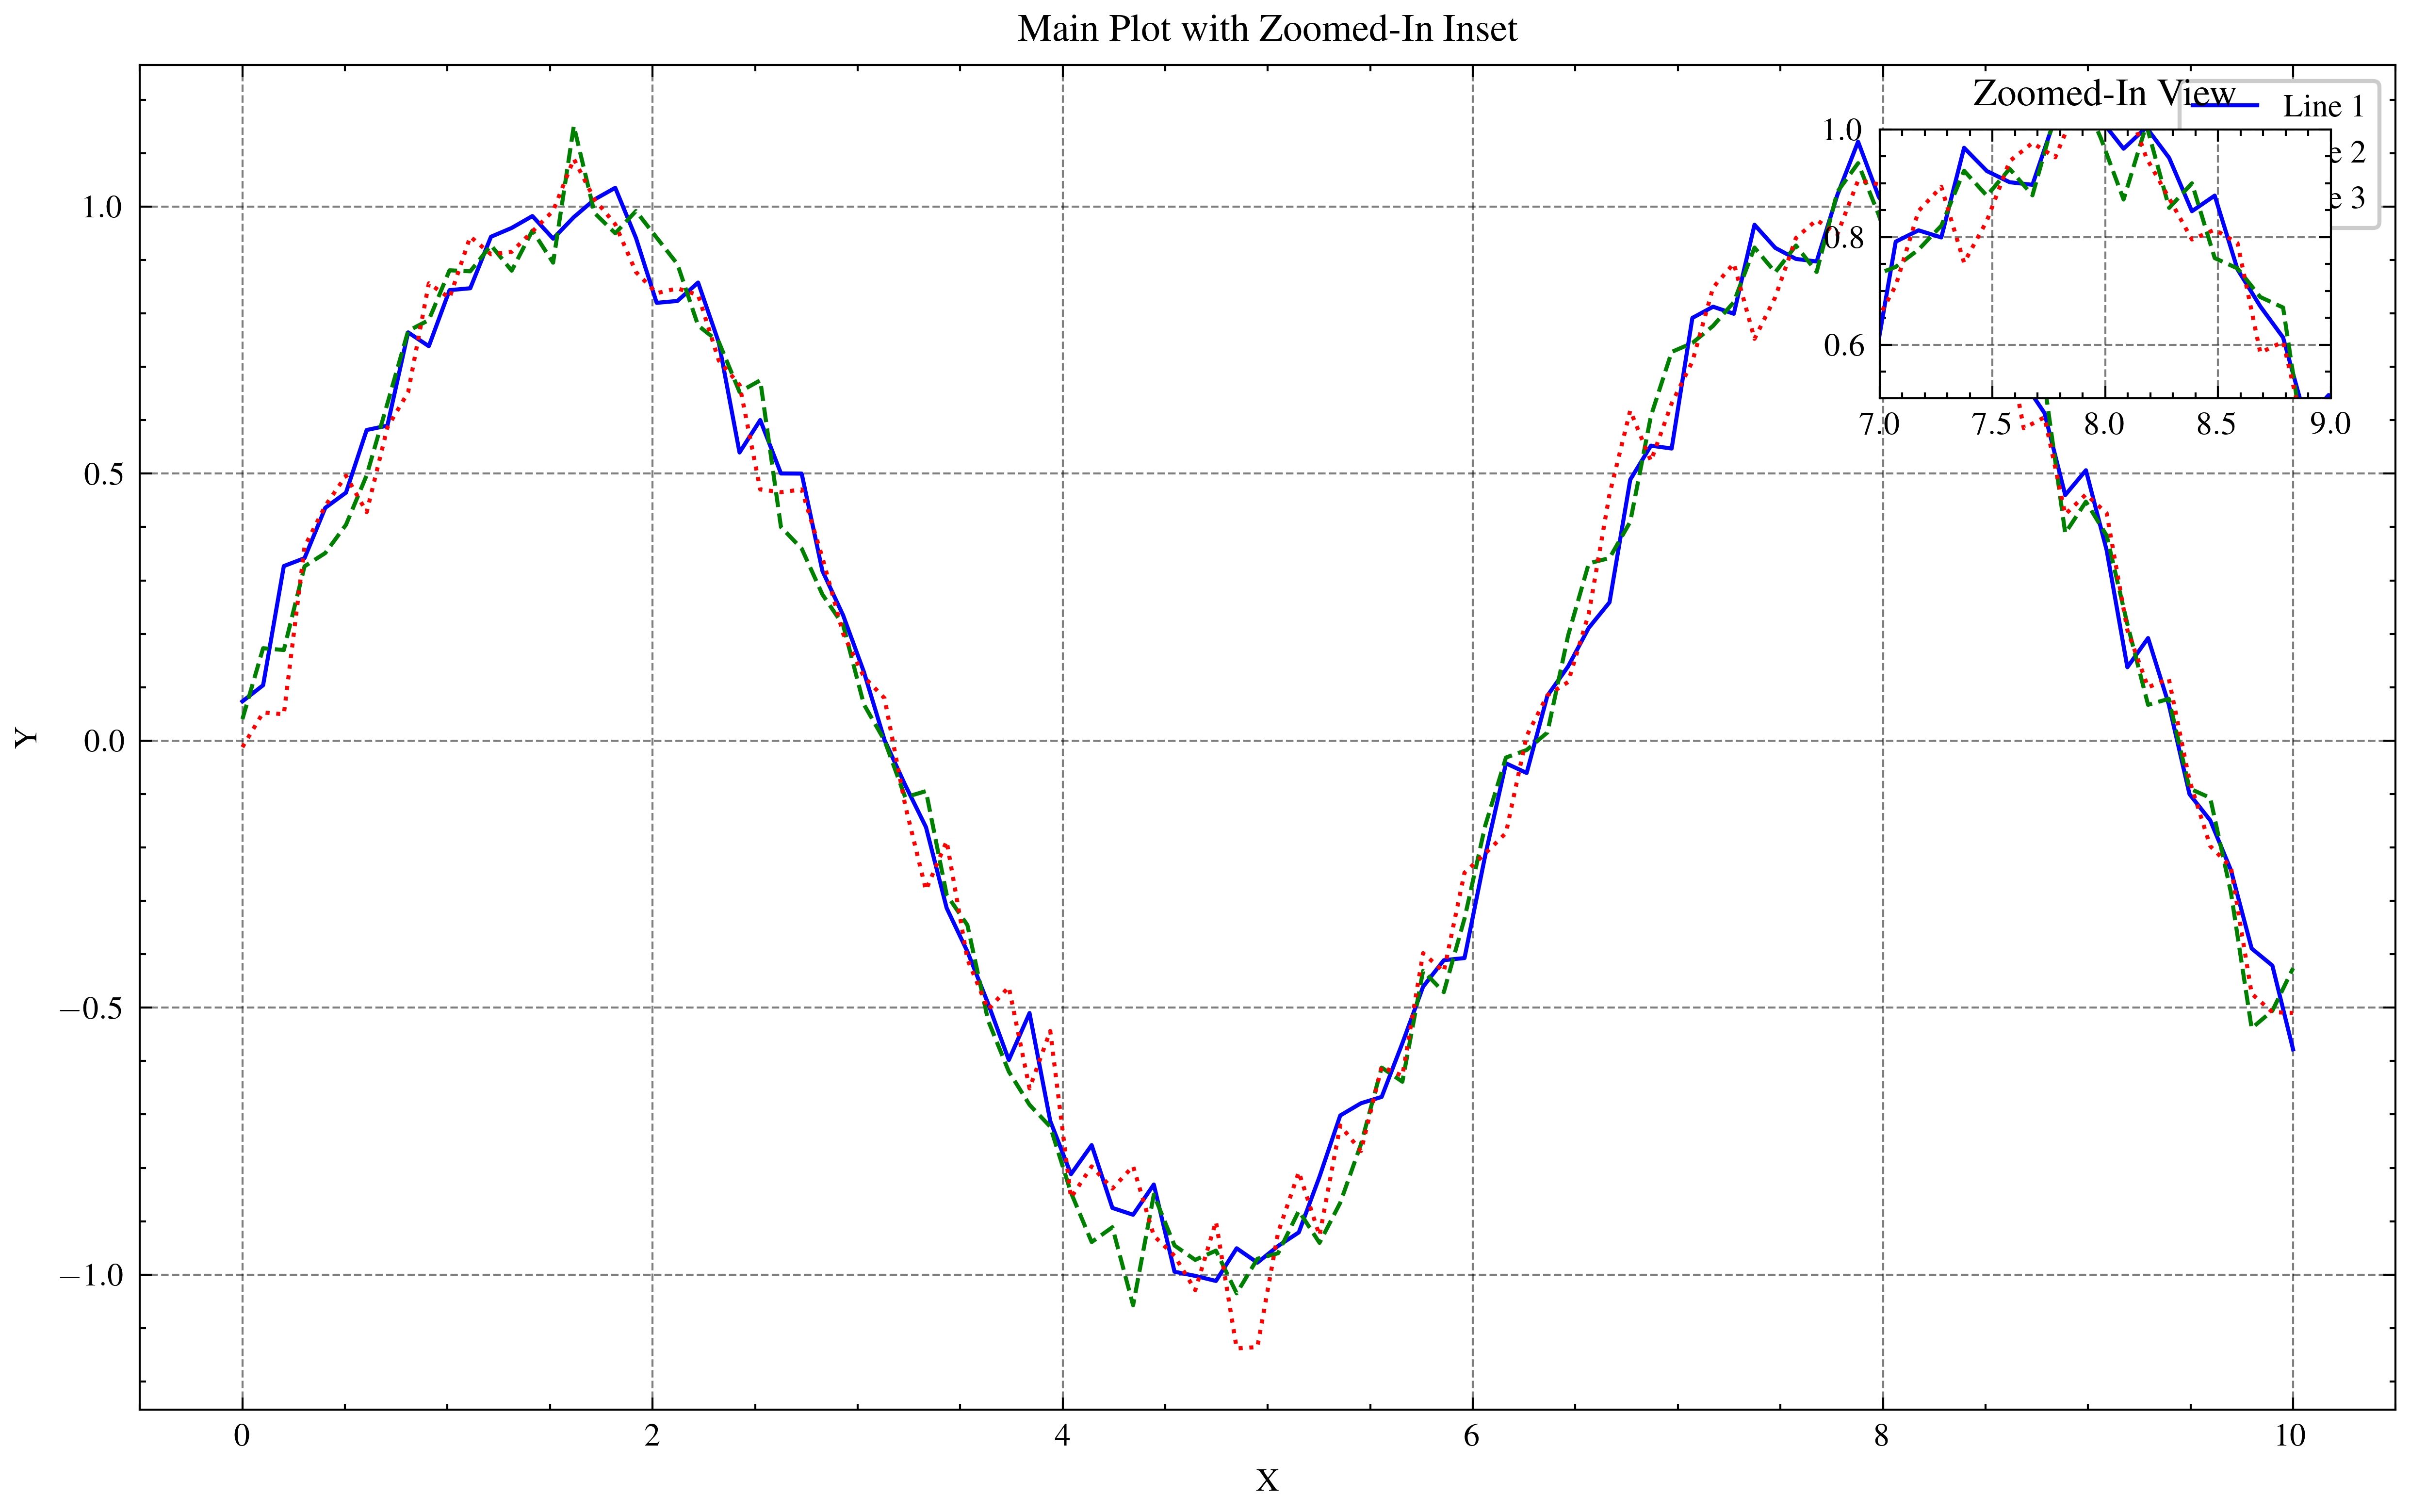

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# 生成示例数据
x = np.linspace(0, 10, 100)
y1 = np.sin(x) + 0.05 * np.random.normal(size=len(x))  # 第一条线
y2 = np.sin(x) + 0.06 * np.random.normal(size=len(x))  # 第二条线
y3 = np.sin(x) + 0.07 * np.random.normal(size=len(x))  # 第三条线

# 创建主图
fig, ax = plt.subplots(figsize=(10, 6))

# 绘制三条线
ax.plot(x, y1, label='Line 1', color='blue')
ax.plot(x, y2, label='Line 2', color='green')
ax.plot(x, y3, label='Line 3', color='red')

# 设置主图标题和标签
ax.set_title('Main Plot with Zoomed-In Inset')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()

# 添加局部放大窗口
ax_inset = inset_axes(ax, width="20%", height="20%", loc='upper right', borderpad=2)

# 在局部放大窗口中绘制细节
zoom_x_start, zoom_x_end = 7, 9  # 放大范围
ax_inset.plot(x, y1, label='Line 1', color='blue')
ax_inset.plot(x, y2, label='Line 2', color='green')
ax_inset.plot(x, y3, label='Line 3', color='red')

# 设置局部放大窗口的范围
ax_inset.set_xlim(zoom_x_start, zoom_x_end)
ax_inset.set_ylim(0.5, 1)  # 根据需要调整 Y 轴范围

# 添加局部放大窗口的标题
ax_inset.set_title('Zoomed-In View')

# 显示网格（可选）
ax_inset.grid(True)

# 显示图
plt.show()